<a href="https://colab.research.google.com/github/mesha4545a/Assigment-2/blob/master/Copy_of_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Assignment

#### Deleverables
- EDA 
    - Tell / show me about your data
    - Etc...
- Data prep / wrangling
    - pick & prep your features
    - [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - Etc...
- Model
    - Import and make a [DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    - Bonus: [GridSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or [RandomizedSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
    - Bonus: [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
        - Explain what's going on..
- Score your model
    - Accuracy
    - Confusion matrix
    - Etc...
- Display your decision tree with [plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) (or similar)
    - Explain your tree
    - Etc...

In [1]:
%%capture
!pip install category-encoders
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce

[Data Source](https://archive.ics.uci.edu/ml/datasets/car+evaluation)

In [2]:
# Run to see Data Dictionary
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was 

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", 
                 names=["price", "maint", "doors", "persons", "lug_boot", "safety"],).reset_index()
df.columns = ["price", "maint", "doors", "persons", "lug_boot", "safety","target"]
df.head()

price  maint doors persons lug_boot safety target
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [4]:
# Ordinally Encoded DF if needed
encoder = ce.OrdinalEncoder()
df_encode = encoder.fit_transform(df)
df_encode.head()

price  maint  doors  persons  lug_boot  safety  target
0      1      1      1        1         1       1       1
1      1      1      1        1         1       2       1
2      1      1      1        1         1       3       1
3      1      1      1        1         2       1       1
4      1      1      1        1         2       2       1

**EDA**
- Tell / show me about your data
- Etc...

In [5]:
df.describe()

price  maint doors persons lug_boot safety target
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2    more    small   high  unacc
freq      432    432   432     576      576    576   1210

In [6]:
df.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

In [7]:
df.target.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: target, dtype: int64

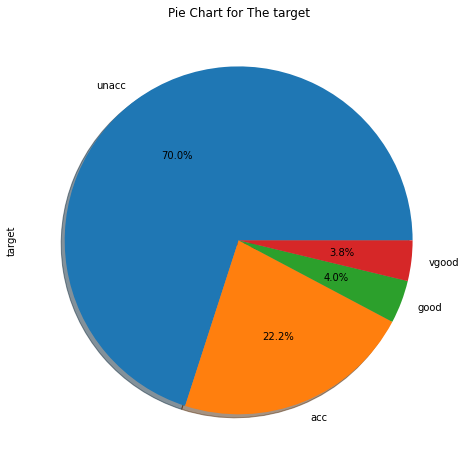

In [8]:
import matplotlib.pyplot as plt

df['target'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for The target')
plt.show()
#intersting

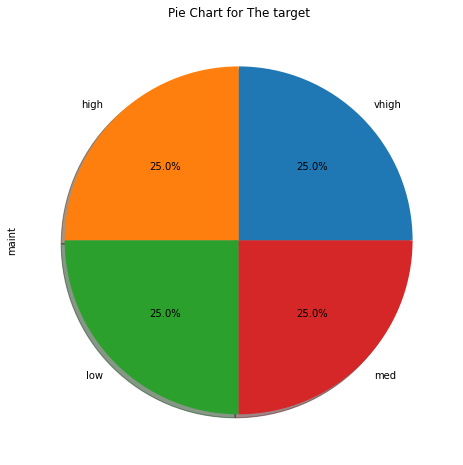

In [9]:
df['maint'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for The target')
plt.show()

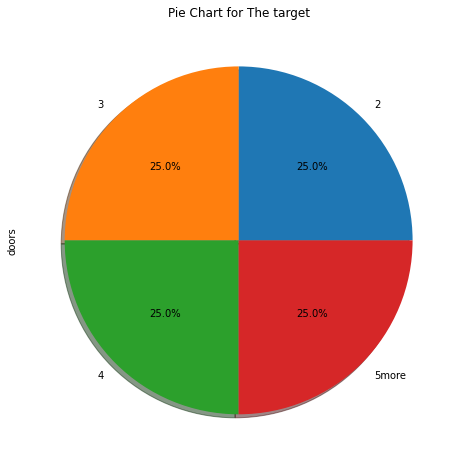

In [10]:
df['doors'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for The target')
plt.show()


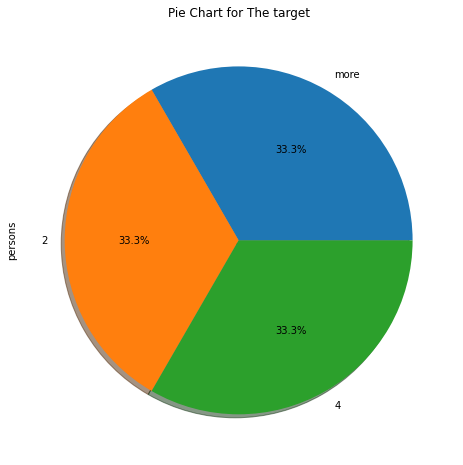

In [11]:
df['persons'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for The target')
plt.show()

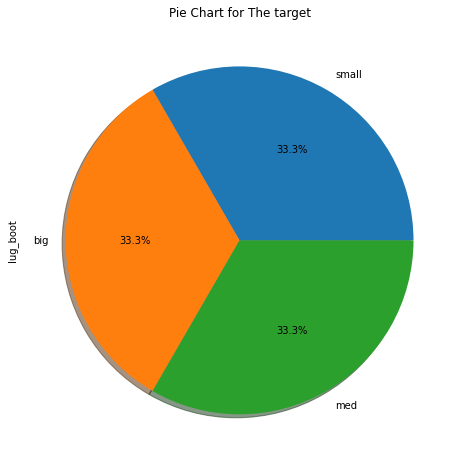

In [12]:
df['lug_boot'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for The target')
plt.show()


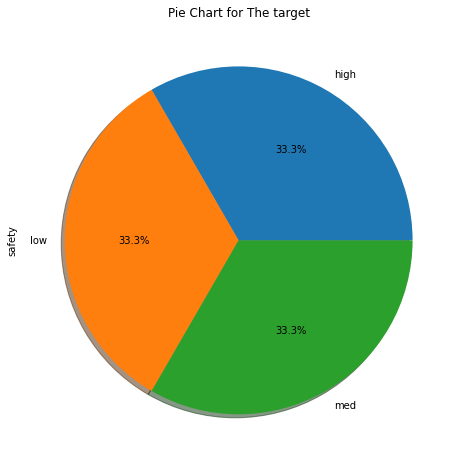

In [13]:
df['safety'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for The target')
plt.show()


- Every category in every feature has equal represent?
- probability I should compare features to have an accurate score 


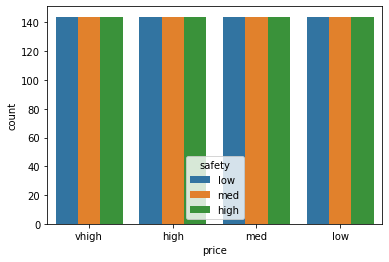

In [15]:
import seaborn as sns
sns.countplot(x="price", hue="safety",data=df)

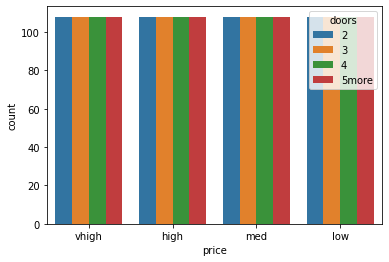

In [16]:
sns.countplot(x="price", hue="doors",data=df)

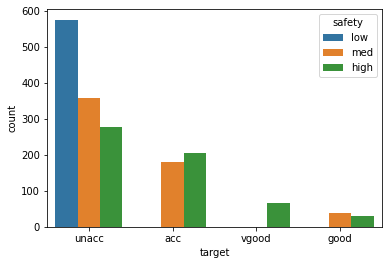

In [17]:
sns.countplot(x="target", hue="safety",data=df)

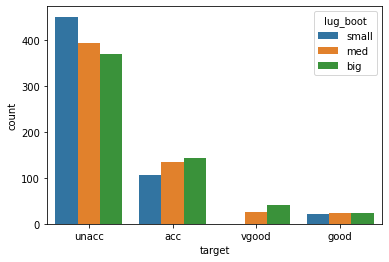

In [18]:
sns.countplot(x="target", hue="lug_boot",data=df)

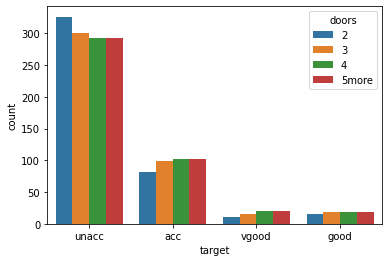

In [19]:
sns.countplot(x="target", hue="doors",data=df)

**Data prep / wrangling**
- pick & prep your features
- train_test_split()
- Etc...

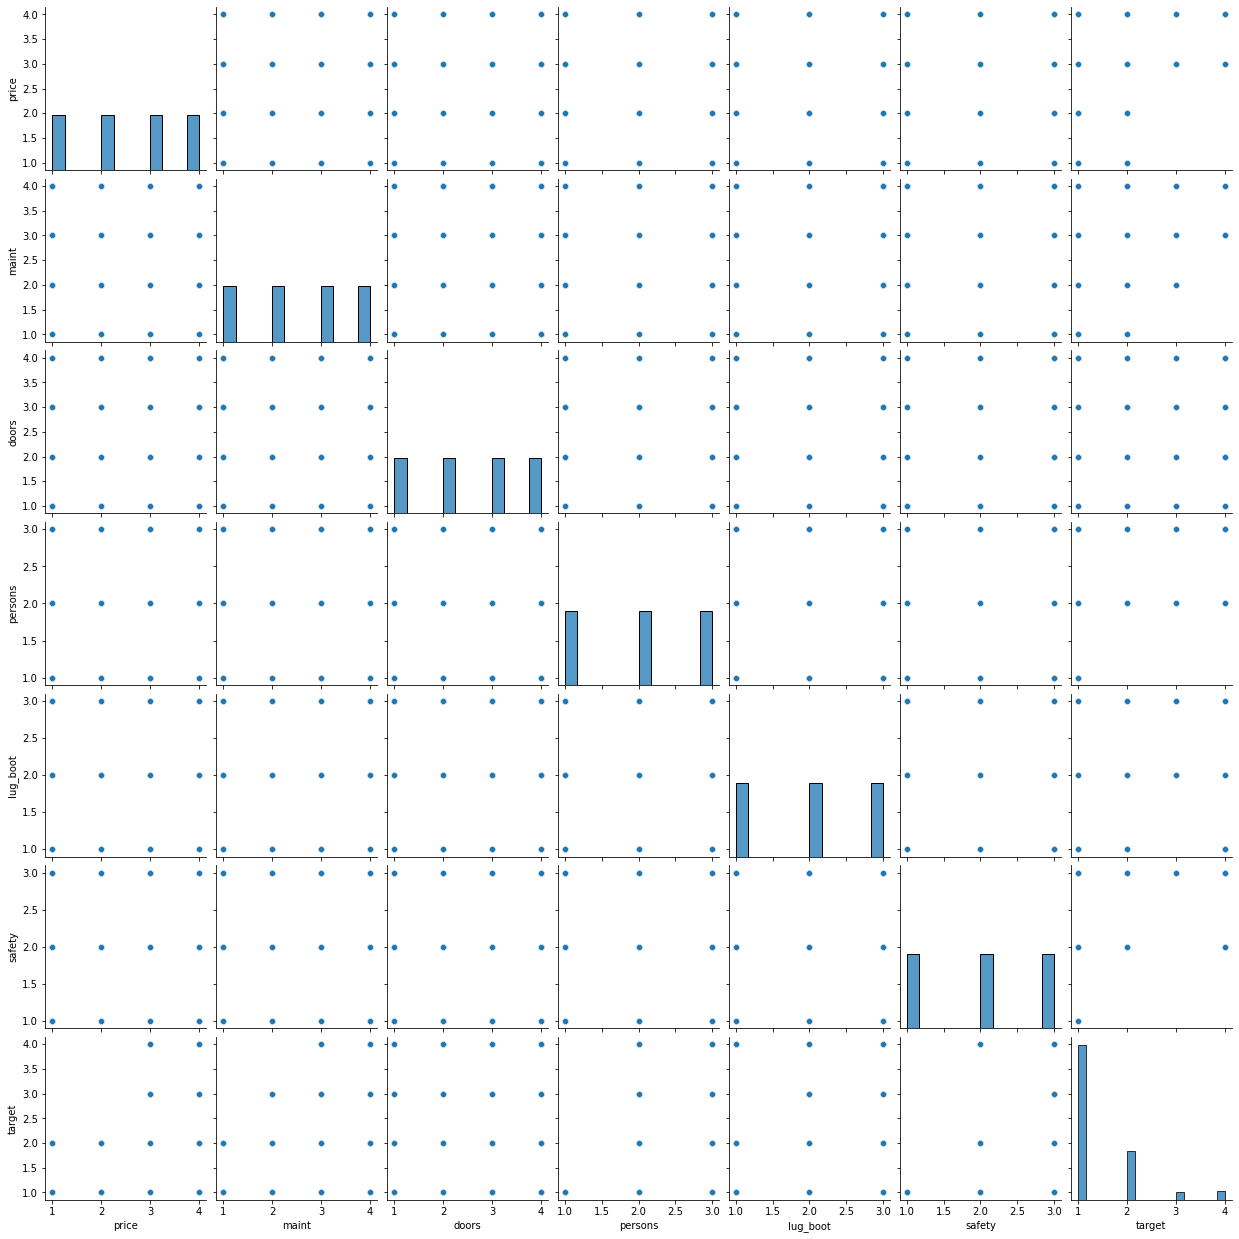

In [20]:
sns.pairplot(df_encode)

In [21]:
corr = df_encode.corr()
corr.style.background_gradient(cmap='coolwarm')

**chosen feature:**
- persons,saftey, price,maint

In [22]:
from sklearn.model_selection import train_test_split

X =df_encode[['persons', 'safety','price','maint']]
y = df_encode['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2)

**Model**
- Import and make a DecisionTreeClassifier()
- Bonus: GridSearchCV() or RandomizedSearchCV()
- Bonus: RandomForestClassifier()
  - Explain what's going on..

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
dtc.predict(X_test)

array([1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 3, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3,

In [25]:
from sklearn.metrics import accuracy_score

preds = dtc.predict(X_test)

accuracy_score(y_test, preds)

0.8574181117533719

high accuracy 

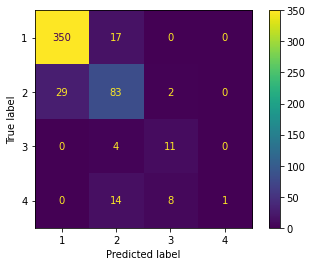

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtc,X_test, y_test, values_format='')

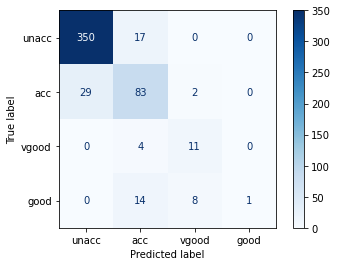

In [27]:
plot_confusion_matrix(dtc, X=X_test, y_true=y_test, cmap='Blues',values_format='',
                      display_labels=df.target.unique())

the TP for the model is high specilly in unacc and acc
though it can be more accuret 

**Bonus:**
- GridSearchCV()

In [28]:
from sklearn.model_selection import GridSearchCV
p_grid = {'criterion':['gini', 'entropy'],
          'max_leaf_nodes':[10,100,100],
          'splitter':['best', 'random'],
          'max_features':['auto', 'sqrt', 'log2'],
          'random_state':[0,1,2,3],
          'max_depth':[10,100,100],
           'min_impurity_decrease':[0.0,0.1,0.2],
          'min_impurity_split':[0.0,0.1,0.2]
}

grid = GridSearchCV(dtc, p_grid, cv=10,n_jobs=-1)

In [29]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='d...-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth'

In [30]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [31]:
dtc = DecisionTreeClassifier(criterion='gini',
                             max_features= 'auto', 
                             splitter= 'best',
                             random_state= 0,
                             max_depth=10,
                             max_leaf_nodes=10,
                             min_impurity_decrease=0.0,
                             min_impurity_split=0.0
                             )

dtc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [32]:
dtc.predict(X_test)

array([1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 4, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 4, 4, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 3, 2, 2, 1, 1, 2, 1, 2, 1, 3, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 3, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 3, 4,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3,

In [33]:

preds = dtc.predict(X_test)

accuracy_score(y_test, preds)

0.8689788053949904

In [34]:
0.8689788053949904-0.8574181117533719

0.011560693641618491

more acuret by 0.011560693641618491


In [35]:
from sklearn.ensemble import RandomForestClassifier

- Display your decision tree with plot_tree() (or similar)
- Explain your tree
- Etc...

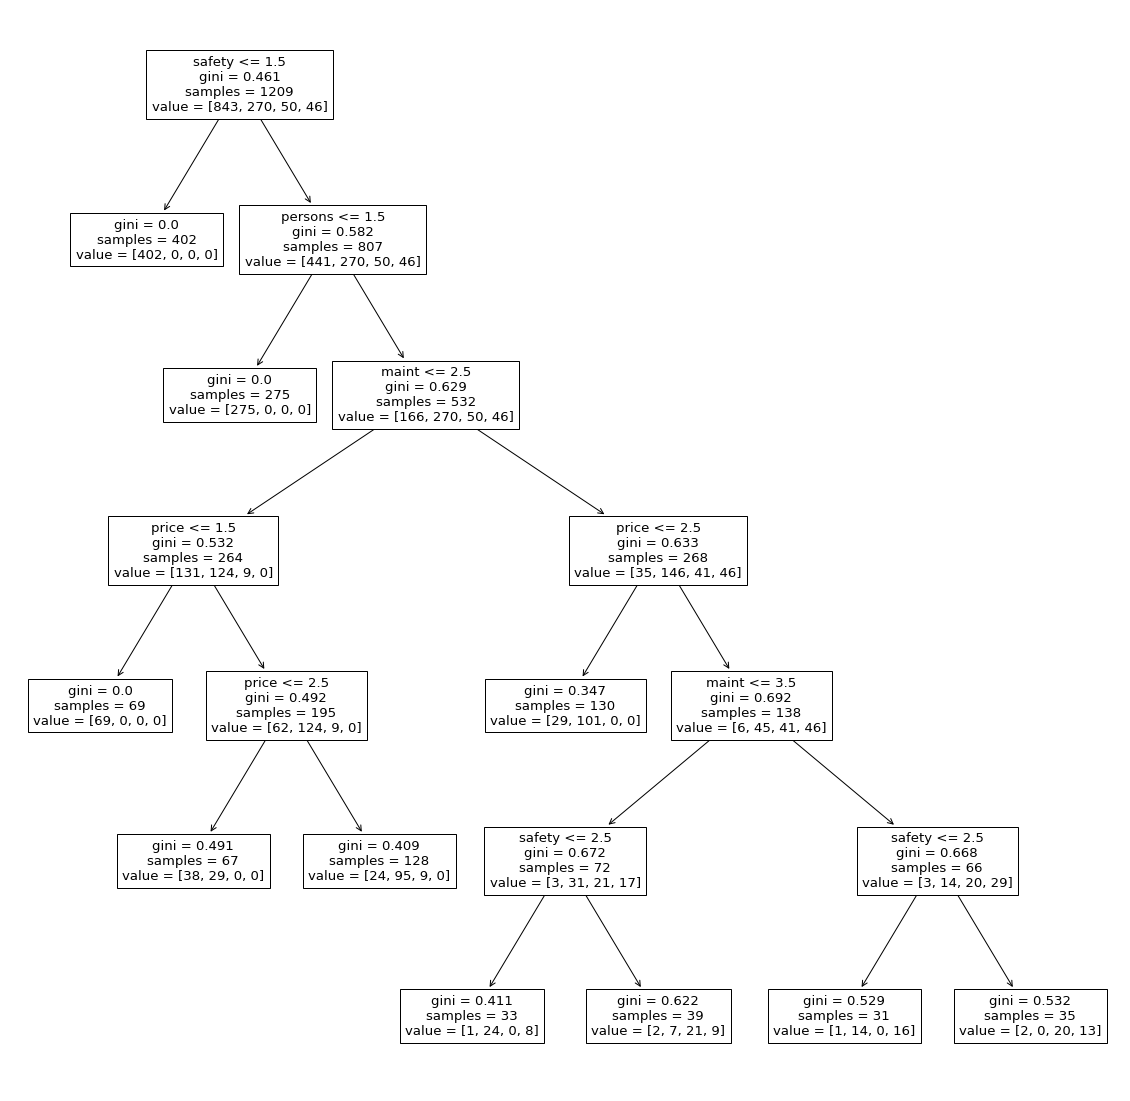

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

plot_tree(dtc, feature_names=['persons', 'safety','price','maint']);

the first feature the model choose is saftey<=1.5 at 0.461 purity
the second it decided to go with the feature pearson<=1.5 at 0.582 purity
it decarded the other branch at Pearsons because of the purity score at 0.0
the tree continue to do that with all the features that were chosen
until it goes to price feature 
on the right branch, it took again maint and safety  with different value to compare on.
on the left, it continues using price with different value to compare on

In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.predict(X_test)

array([1, 2, 4, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 4, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 3, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3,

In [38]:
from sklearn.metrics import accuracy_score

r = model.predict(X_test)

accuracy_score(y_test, r)

0.8574181117533719

https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

In [39]:
estimator = model.estimators_[5]

In [40]:
c =pd.DataFrame(df_encode[['persons', 'safety','price','maint']])
c.columns

Index(['persons', 'safety', 'price', 'maint'], dtype='object')

In [41]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = c.columns,
                class_names = c.columns,
                rounded = True, proportion = False, 
                precision = 7, filled = True)


don,t run made my browser crash

In [46]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=6000000'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

- Random Forests takes majority vote among estimators gives an estimate of the probability 
- it rember what the other branches did and takes pmajority vote